In [1]:
# 1. IMPORT LIBRARIES
#====================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. IMPORTING FILE
#===================

df=pd.read_csv('train.csv')

In [3]:
# 3. FILE DETAILS
#================

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Survived', ylabel='count'>

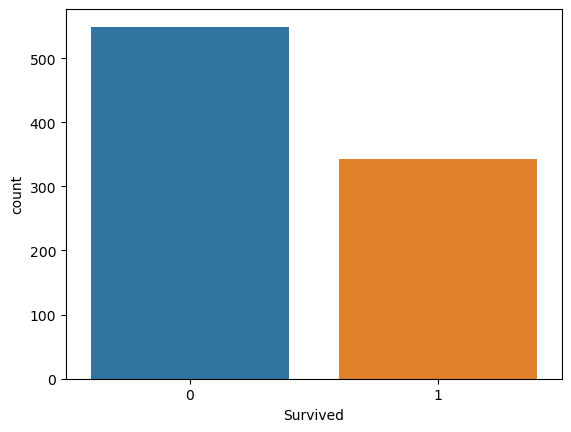

In [6]:
# 4. EXPLORATORY ANALYSIS FOR ALL COLUMNS ASIDE PASSENGER ID, NAME (ticket, cabin not relevant)|| PLOT COUNTS FOR ALL COLUMNS
#============================================================================================================================

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.countplot(df.Survived)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

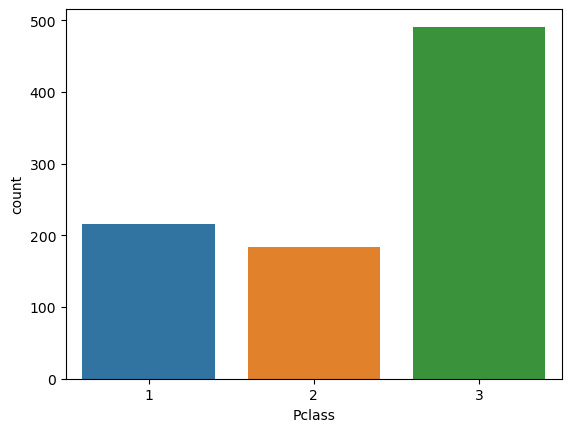

In [7]:
sns.countplot(df.Pclass)

<AxesSubplot:xlabel='Sex', ylabel='count'>

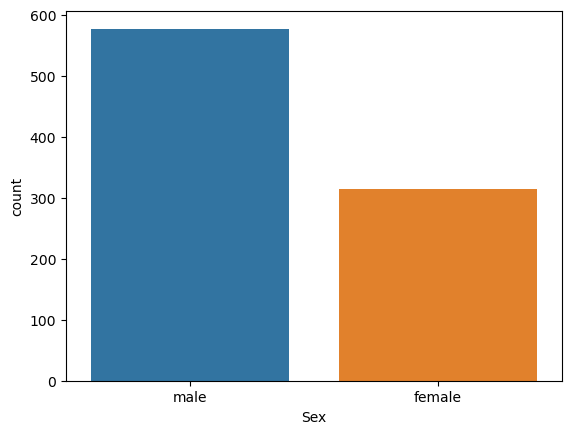

In [8]:
sns.countplot(df.Sex)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

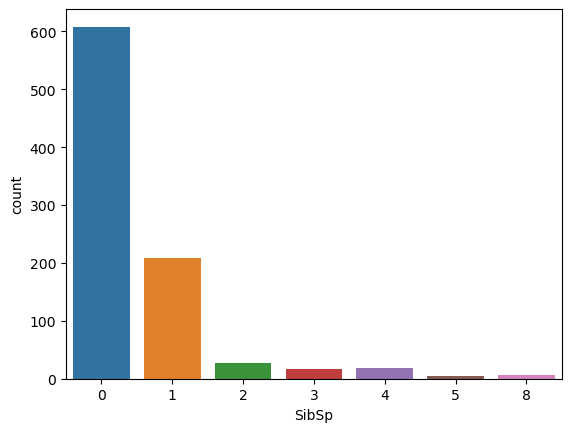

In [9]:
sns.countplot(df.SibSp)

<AxesSubplot:xlabel='Parch', ylabel='count'>

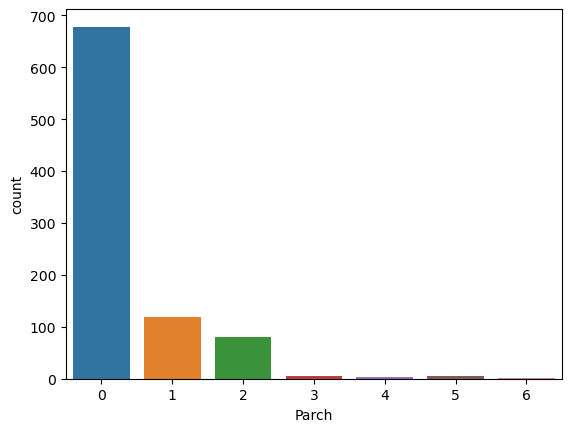

In [10]:
sns.countplot(df.Parch)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

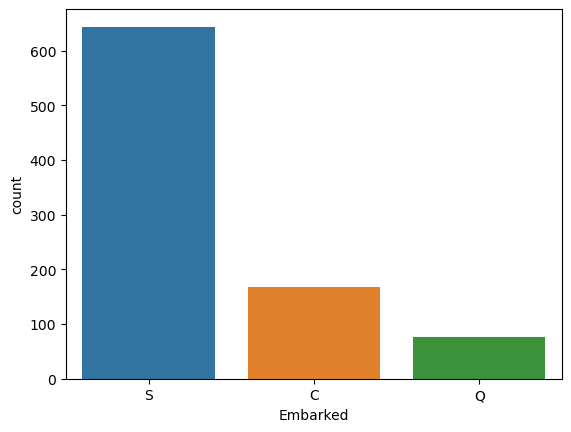

In [11]:
sns.countplot(df.Embarked)

<AxesSubplot:xlabel='Age', ylabel='Density'>

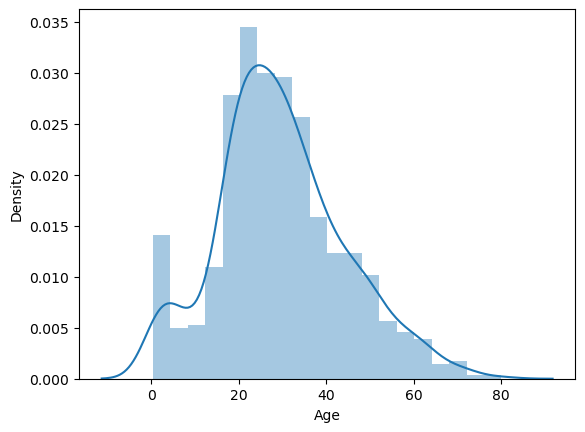

In [12]:
sns.distplot(df.Age) #note there is displot and distplot

<AxesSubplot:xlabel='Fare', ylabel='Density'>

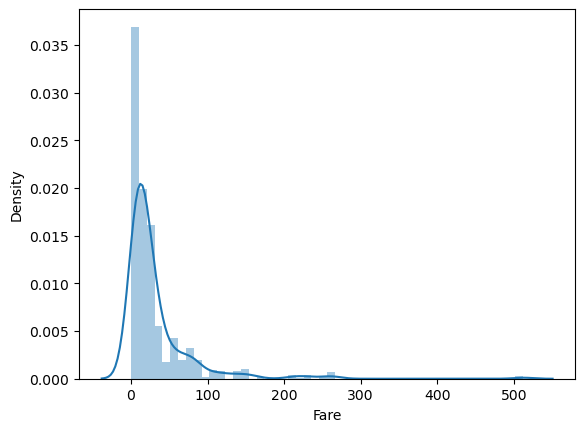

In [13]:
sns.distplot(df.Fare)

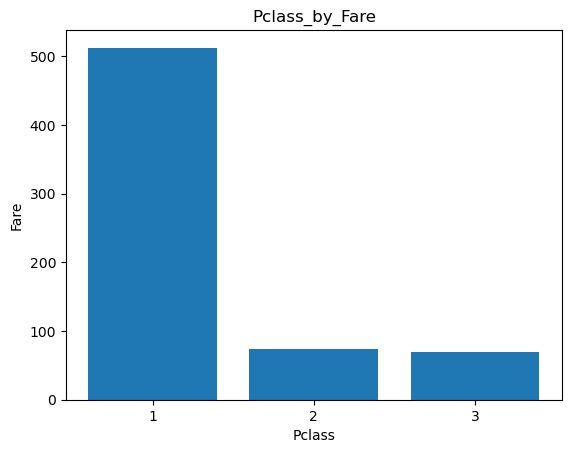

In [14]:
#PLOTTING CORRELATIONS BETWEEN THE COLUMNS
#========================================

plt.bar(df.Pclass,df.Fare)
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Pclass_by_Fare')
plt.xticks([1,2,3])
plt.show()

In [15]:
# 5A. CLEANING DATA BY COLUMN
#========================

# Table | NamedRanges -Spelling(str|  Blanks | Dates(dates) | Spaces(str) | Diagnostics(int/str) | Characters | Duplicates
# A. Passenger (int)
df['PassengerId'].duplicated().sum()

0

In [16]:
# B. Survived-Perfect, given already
# C. Pclass - no issues
# D. Name - no issues
# E. Sex
df['Sex'].nunique()
df['SexInBinary'] = np.where(df.Sex=='male',1,0)

In [17]:
# F. Age, mean age = 29.699118
df['Age'] = df['Age'].replace(np.NaN,29.7)

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexInBinary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [19]:
# Drop Columns
#The best way to do this in Pandas is to use drop:

#df = df.drop('column_name', axis=1)
#where 1 is the axis number (0 for rows and 1 for columns.)

In [20]:
df = df.drop('Name',axis=1).drop('Ticket',axis=1).drop('Cabin',axis=1).drop('Embarked',axis=1).drop('Sex',axis=1)

In [21]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SexInBinary
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1
887,888,1,1,19.0,0,0,30.0000,0
888,889,0,3,29.7,1,2,23.4500,0
889,890,1,1,26.0,0,0,30.0000,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   SexInBinary  891 non-null    int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB


In [23]:
# 5B. IMPORT TEST DATA, CLEAN DATA, THEN COMBINE DATA
df2=pd.read_csv('test.csv')
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [24]:
df2['SexInBinary']=np.where(df2.Sex=='male',1,0)

In [25]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexInBinary
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


In [26]:
df2=df2.drop('Name',axis=1).drop('Ticket',axis=1).drop('Cabin',axis=1).drop('Embarked',axis=1).drop('Sex',axis=1)

In [27]:
df2['Age'] = df2['Age'].replace(np.nan,29.7)

In [28]:
df2

,PassengerId,Pclass,Age,SibSp,Parch,Fare,SexInBinary
0,892,3,34.5,0,0,7.8292,1
1,893,3,47.0,1,0,7.0000,0
2,894,2,62.0,0,0,9.6875,1
3,895,3,27.0,0,0,8.6625,1
4,896,3,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,1305,3,29.7,0,0,8.0500,1
414,1306,1,39.0,0,0,108.9000,0
415,1307,3,38.5,0,0,7.2500,1
416,1308,3,29.7,0,0,8.0500,1


In [29]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SexInBinary
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1
887,888,1,1,19.0,0,0,30.0000,0
888,889,0,3,29.7,1,2,23.4500,0
889,890,1,1,26.0,0,0,30.0000,1


In [30]:
# 5C. CONCATENATE
df3 = pd.concat([df,df2], axis = 0)

In [31]:
df3.reset_index()
df3

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SexInBinary
0,1,0.0,3,22.0,1,0,7.2500,1
1,2,1.0,1,38.0,1,0,71.2833,0
2,3,1.0,3,26.0,0,0,7.9250,0
3,4,1.0,1,35.0,1,0,53.1000,0
4,5,0.0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
413,1305,NaN,3,29.7,0,0,8.0500,1
414,1306,NaN,1,39.0,0,0,108.9000,0
415,1307,NaN,3,38.5,0,0,7.2500,1
416,1308,NaN,3,29.7,0,0,8.0500,1


In [32]:
# 6. PREDICTIVE ANALYSIS WITH REGRESSION & CORRELATION
#=================================================

#Make Fare a bell distribution 
df3['Fare']=np.log(df3['Fare']+1)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

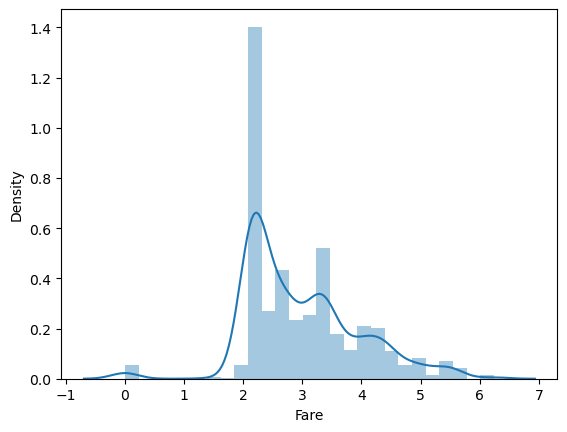

In [33]:
sns.distplot(df3['Fare'])

In [34]:
##Correlation Matrix

<AxesSubplot:>

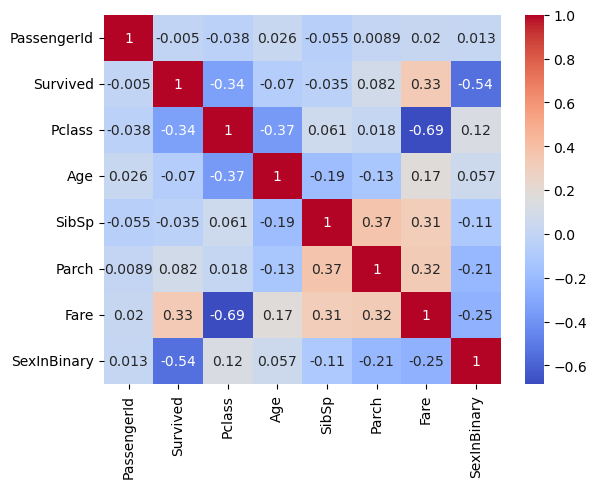

In [35]:
corr = df3.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm') #colormap = coolwarm, corr is correlation

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

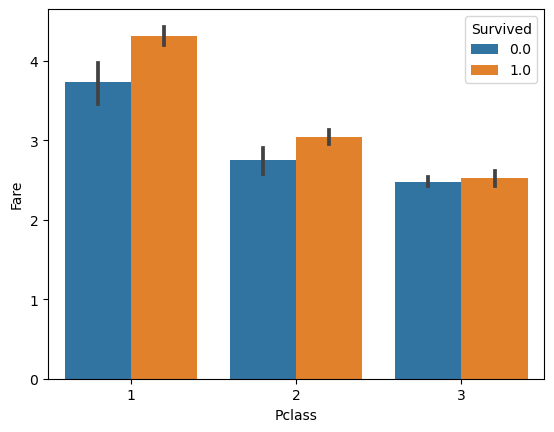

In [36]:
#A negative correlationas the value of one variable increases, the other decreases.
#A positive correlation means that the variables move in the same direction.

sns.barplot(data=df3, x='Pclass', y='Fare', hue='Survived') #???????????

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

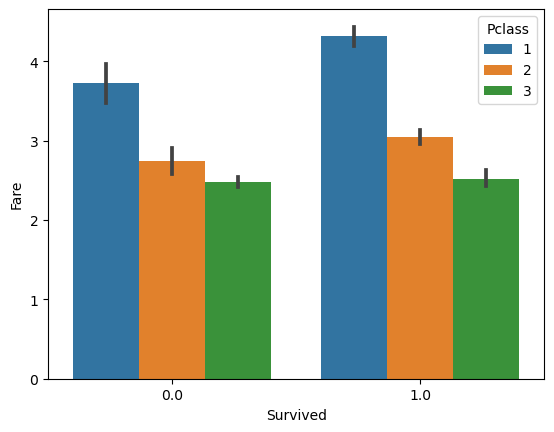

In [37]:
sns.barplot(data=df3, x='Survived', y='Fare', hue='Pclass') #???????????

In [38]:
# 7. MODEL FOR REGRESSION
#========================

# 7B. SPLIT TRAININGN AND TEST DATA
#==================================

df_len = len(df)
df2_len = len(df2)

In [39]:
df_len


891

In [40]:
df2_len

418

In [41]:
df_train=df3.iloc[:df_len, :]
df_test=df3.iloc[df_len:, :]

In [42]:
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SexInBinary
0,1,0.0,3,22.0,1,0,2.110213,1
1,2,1.0,1,38.0,1,0,4.280593,0
2,3,1.0,3,26.0,0,0,2.188856,0
3,4,1.0,1,35.0,1,0,3.990834,0
4,5,0.0,3,35.0,0,0,2.202765,1
...,...,...,...,...,...,...,...,...
886,887,0.0,2,27.0,0,0,2.639057,1
887,888,1.0,1,19.0,0,0,3.433987,0
888,889,0.0,3,29.7,1,2,3.196630,0
889,890,1.0,1,26.0,0,0,3.433987,1


In [43]:
df_test

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SexInBinary
0,892,NaN,3,34.5,0,0,2.178064,1
1,893,NaN,3,47.0,1,0,2.079442,0
2,894,NaN,2,62.0,0,0,2.369075,1
3,895,NaN,3,27.0,0,0,2.268252,1
4,896,NaN,3,22.0,1,1,2.586824,0
...,...,...,...,...,...,...,...,...
413,1305,NaN,3,29.7,0,0,2.202765,1
414,1306,NaN,1,39.0,0,0,4.699571,0
415,1307,NaN,3,38.5,0,0,2.110213,1
416,1308,NaN,3,29.7,0,0,2.202765,1


In [44]:
# 7C. Regression
#Independent variables X
#Dependent variables y
x = df_train.drop(columns=['PassengerId','Survived'])
y = df_train['Survived'] 

In [45]:
x

,Pclass,Age,SibSp,Parch,Fare,SexInBinary
0,3,22.0,1,0,2.110213,1
1,1,38.0,1,0,4.280593,0
2,3,26.0,0,0,2.188856,0
3,1,35.0,1,0,3.990834,0
4,3,35.0,0,0,2.202765,1
...,...,...,...,...,...,...
886,2,27.0,0,0,2.639057,1
887,1,19.0,0,0,3.433987,0
888,3,29.7,1,2,3.196630,0
889,1,26.0,0,0,3.433987,1


In [46]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)


In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.8161434977578476


In [49]:
model.fit(x, y)
model.score(x,y)

0.7991021324354658

In [50]:
xx = df_test.drop(columns=['PassengerId','Survived'])
yy = df_test['Survived']

In [51]:
xx

,Pclass,Age,SibSp,Parch,Fare,SexInBinary
0,3,34.5,0,0,2.178064,1
1,3,47.0,1,0,2.079442,0
2,2,62.0,0,0,2.369075,1
3,3,27.0,0,0,2.268252,1
4,3,22.0,1,1,2.586824,0
...,...,...,...,...,...,...
413,3,29.7,0,0,2.202765,1
414,1,39.0,0,0,4.699571,0
415,3,38.5,0,0,2.110213,1
416,3,29.7,0,0,2.202765,1


In [52]:
xx.Fare.mode()

0    2.169054
Name: Fare, dtype: float64

In [53]:
xx['Fare']=xx['Fare'].replace(np.nan,2.169054)

In [54]:
xx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         418 non-null    float64
 5   SexInBinary  418 non-null    int32  
dtypes: float64(2), int32(1), int64(3)
memory usage: 21.2 KB


In [55]:
pred = model.predict(xx)
pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [56]:
sub = pd.read_csv('gender_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [57]:
sub['Survived'] = pred
sub['Survived']= sub['Survived'].astype('int')

In [58]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 5.0 KB


In [59]:
sub.to_csv('submission.csv', index=False)

In [60]:
from pivottablejs import pivot_ui
pivot_ui(df)

ModuleNotFoundError: No module named 'pivottablejs'